<a href="https://colab.research.google.com/github/annasajkh/AutoEncoder/blob/main/ConvulotionalAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
import torch
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.encoder = nn.Sequential(
      nn.Conv2d(3, 16, kernel_size=3, stride=3, padding=1),
      nn.LeakyReLU(True),
      nn.MaxPool2d(2, 2),

      nn.Conv2d(16, 8, kernel_size=5, stride=2, padding=1),
      nn.LeakyReLU(True),
      nn.MaxPool2d(2, 1)
    )

    self.decoder = nn.Sequential(
      nn.ConvTranspose2d(8, 16, kernel_size=5, stride=2),
      nn.LeakyReLU(True),

      nn.ConvTranspose2d(16, 8, kernel_size=5, stride=3, padding=1),
      nn.LeakyReLU(True),

      nn.ConvTranspose2d(8, 3, kernel_size=5, stride=2, padding=1),
      nn.Tanh(),
    )

  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

model = Net()
optimizer = Adam(model.parameters(), lr=0.0001)
loss_function = nn.MSELoss()

if torch.cuda.is_available():
    model = model.cuda()
    loss_function = loss_function.cuda()

In [179]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


image_size = 199

opener = urllib.request.URLopener()
opener.addheader("User-Agent", "Firefox")
opener.retrieve("https://thispersondoesnotexist.com/image", "img.jpeg")

x = np.array(Image.open("img.jpeg").resize((image_size,image_size))) / 255
x = torch.from_numpy(x)

if torch.cuda.is_available():
  x = x.cuda()

x = x.view(1, 3, image_size, image_size).float()

for i in tqdm(range(10_000)):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_function(output, x)

  loss.backward()
  optimizer.step()

100%|██████████| 10000/10000 [02:05<00:00, 79.56it/s]


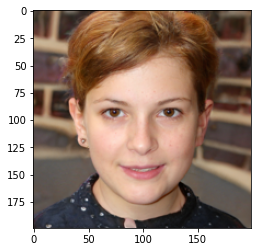

In [180]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x.reshape(image_size, image_size, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


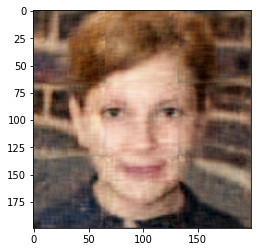

In [181]:
output = model(x)
output = output.view(image_size, image_size, 3).detach().numpy()
plt.imshow(output)